## DX799S O1 Data Science Capstone (Summer 1 2025): ACTIVITY 3.3 ##

Each week, you will apply the concepts of that week to your Integrated Capstone Project’s dataset. In preparation for Milestone One, create a Jupyter Notebook (similar to in Module B, Semester Two) that illustrates these lessons. There are no specific questions to answer in your Jupyter Notebook files in this course; your general goal is to analyze your data, using the methods you have learned about in this course and in this program, and draw interesting conclusions. 

For Week 3, include concepts such as linear regression with forward and backward selection, PCR, and PLSR. Complete your Jupyter Notebook homework by 11:59 pm ET on Sunday. 

In Week 7, you will compile your findings from your Jupyter Notebook homework into your Milestone One assignment for grading. For full instructions and the rubric for Milestone One, refer to the following link.  

In [205]:
# ===================================
# Useful Imports: Add more as needed
# ===================================

# Standard Libraries
import os
import time
import math
import io
import zipfile
import requests
from urllib.parse import urlparse
from itertools import chain, combinations

# Data Science Libraries
import numpy as np
import pandas as pd
import seaborn as sns

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mticker  # Optional: Format y-axis labels as dollars
import seaborn as sns

# Scikit-learn (Machine Learning)
from sklearn.model_selection import (
    train_test_split, 
    cross_val_score, 
    GridSearchCV, 
    RandomizedSearchCV, 
    RepeatedKFold
)
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector, f_regression, SelectKBest
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, f1_score
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

The following dataset, "Video Review", is a collection of information that was created based on reviewable video evidence that outlines the events that resulted in a concussion during punt players in the NFL 2016-2017 season. The target, Primary_Impact_Type, outlines if the concussion occurred from the impact of Helmet-to-Helmet, Helmet-to-Body, or Helmet-to-Ground.

In [206]:
#Video Review Dataset with Feature Scaling

df_videoreview = pd.read_csv("video_review.csv")

label_encoder = LabelEncoder()

print("Object columns before encoding:")
print(df_videoreview.select_dtypes(include=['object']).columns)

for col in df_videoreview.select_dtypes(include=['object']).columns:
    df_videoreview[col] = label_encoder.fit_transform(df_videoreview[col].astype(str))


target_column = 'Primary_Impact_Type'  
X = df_videoreview.drop(columns=[target_column])
y = df_videoreview[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Object columns before encoding:
Index(['Player_Activity_Derived', 'Turnover_Related', 'Primary_Impact_Type',
       'Primary_Partner_GSISID', 'Primary_Partner_Activity_Derived',
       'Friendly_Fire'],
      dtype='object')


Step 1: Added Season_Year, R² Score: -0.0443
Step 2: Added Turnover_Related, R² Score: -0.0443
Step 3: Added Primary_Partner_GSISID, R² Score: -0.0464
Step 4: Added Friendly_Fire, R² Score: -0.0807
Step 5: Added GSISID, R² Score: -0.1195
Step 6: Added GameKey, R² Score: -0.2706
Step 7: Added PlayID, R² Score: -0.4112
Step 8: Added Player_Activity_Derived, R² Score: -0.6092
Step 9: Added Primary_Partner_Activity_Derived, R² Score: -0.9692

R² Score Table:
   Step  R² Score                     Feature Added
0     1   -0.0443                       Season_Year
1     2   -0.0443                  Turnover_Related
2     3   -0.0464            Primary_Partner_GSISID
3     4   -0.0807                     Friendly_Fire
4     5   -0.1195                            GSISID
5     6   -0.2706                           GameKey
6     7   -0.4112                            PlayID
7     8   -0.6092           Player_Activity_Derived
8     9   -0.9692  Primary_Partner_Activity_Derived


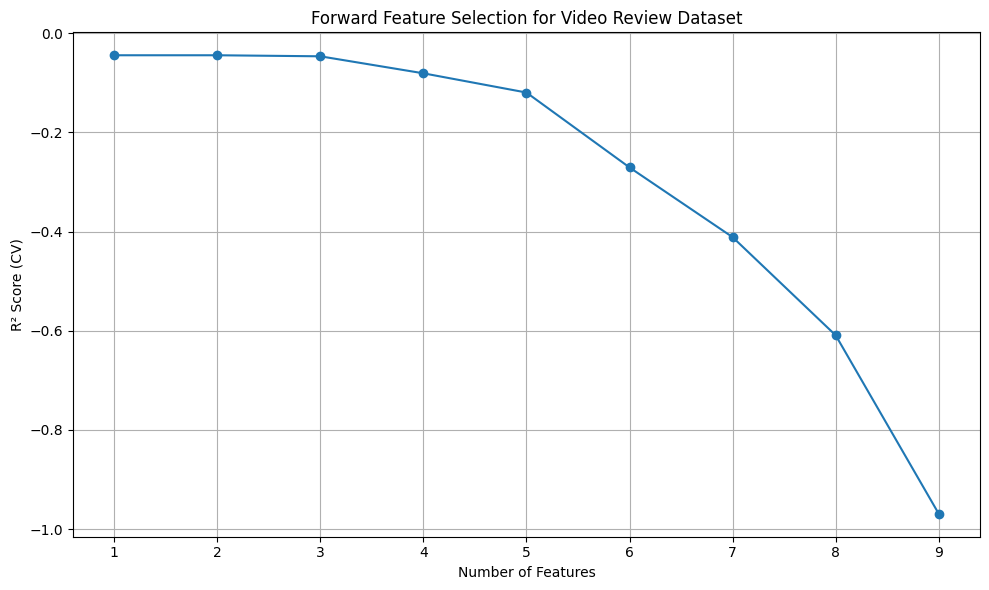

In [207]:
# Video Review Forward Feature Selection

model = LinearRegression()
X = pd.DataFrame(X_train_scaled, columns=X.columns)
y = y_train

selected_features = []
remaining_features = list(X.columns)
r2_scores = []

while remaining_features:
    scores = []
    for feature in remaining_features:
        current_features = selected_features + [feature]
        score = cross_val_score(model, X[current_features], y, cv=5, scoring='r2').mean()
        scores.append((score, feature))
    
    scores.sort(reverse=True)
    best_score, best_feature = scores[0]
    
    selected_features.append(best_feature)
    remaining_features.remove(best_feature)
    r2_scores.append(round(best_score, 4))
    print(f"Step {len(selected_features)}: Added {best_feature}, R² Score: {best_score:.4f}")

results_df_video_review = pd.DataFrame({
    "Step": range(1, len(r2_scores) + 1),
    "R² Score": r2_scores,
    "Feature Added": selected_features
})

print("\nR² Score Table:")
print(results_df_video_review)

plt.figure(figsize=(10, 6))
plt.plot(results_df_video_review["Step"], results_df_video_review["R² Score"], marker='o')
plt.xlabel("Number of Features")
plt.ylabel("R² Score (CV)")
plt.title("Forward Feature Selection for Video Review Dataset")
plt.grid(True)
plt.tight_layout()
plt.show()


In [208]:
best_step = results_df_video_review.loc[results_df_video_review['R² Score'].idxmax()]
print(f"\nBest Step for video review dataset:\n{best_step}")



Best Step for video review dataset:
Step                       1
R² Score             -0.0443
Feature Added    Season_Year
Name: 0, dtype: object


Step 1: Removed PlayID, R² Score: -0.5364
Step 2: Removed Primary_Partner_GSISID, R² Score: -0.3721
Step 3: Removed Season_Year, R² Score: -0.3263
Step 4: Removed GSISID, R² Score: -0.2664
Step 5: Removed Friendly_Fire, R² Score: -0.2168
Step 6: Removed Primary_Partner_Activity_Derived, R² Score: -0.1138
Step 7: Removed Player_Activity_Derived, R² Score: -0.0819
Step 8: Removed GameKey, R² Score: -0.0688

R² Score Table (Backward Elimination):
   Step  R² Score                   Feature Removed
0     1   -0.5364                            PlayID
1     2   -0.3721            Primary_Partner_GSISID
2     3   -0.3263                       Season_Year
3     4   -0.2664                            GSISID
4     5   -0.2168                     Friendly_Fire
5     6   -0.1138  Primary_Partner_Activity_Derived
6     7   -0.0819           Player_Activity_Derived
7     8   -0.0688                           GameKey


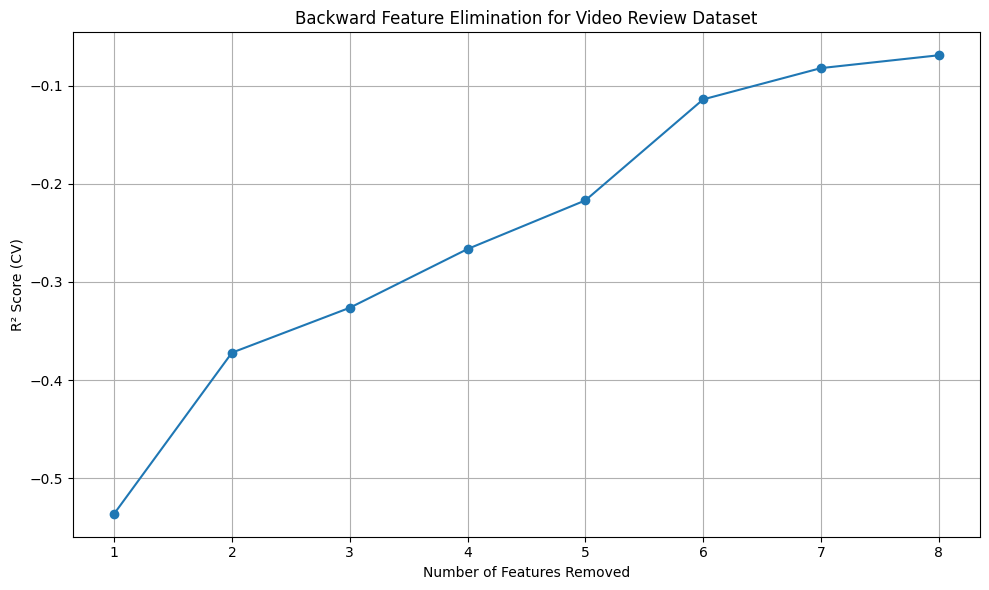

In [209]:
# Video Review Backward Feature Selection

model = LinearRegression()
X = pd.DataFrame(X_train_scaled, columns=X.columns)
y = y_train

selected_features = list(X.columns)
r2_scores = []
features_removed = []

while len(selected_features) > 1:
    scores = []
    for feature in selected_features:
        current_features = [f for f in selected_features if f != feature]
        score = cross_val_score(model, X[current_features], y, cv=5, scoring='r2').mean()
        scores.append((score, feature))
    
    scores.sort(reverse=True)
    best_score, feature_to_remove = scores[0]

    selected_features.remove(feature_to_remove)
    r2_scores.append(round(best_score, 4))
    features_removed.append(feature_to_remove)
    
    print(f"Step {len(features_removed)}: Removed {feature_to_remove}, R² Score: {best_score:.4f}")

results_df_video_review_bwd = pd.DataFrame({
    "Step": range(1, len(r2_scores) + 1),
    "R² Score": r2_scores,
    "Feature Removed": features_removed
})

print("\nR² Score Table (Backward Elimination):")
print(results_df_video_review_bwd)

plt.figure(figsize=(10, 6))
plt.plot(results_df_video_review_bwd["Step"], results_df_video_review_bwd["R² Score"], marker='o')
plt.xlabel("Number of Features Removed")
plt.ylabel("R² Score (CV)")
plt.title("Backward Feature Elimination for Video Review Dataset")
plt.grid(True)
plt.tight_layout()
plt.show()


In [210]:
best_step = results_df_video_review_bwd.loc[results_df_video_review_bwd['R² Score'].idxmax()]
print(f"\nBest Step during backward selection for video review dataset:\n{best_step}")


Best Step during backward selection for video review dataset:
Step                     8
R² Score           -0.0688
Feature Removed    GameKey
Name: 7, dtype: object


In [211]:
# Video Review PCA

target_column = 'Primary_Impact_Type'  
X = df_videoreview.drop(columns=[target_column])
y = df_videoreview[target_column]

n_components = min(X_train.shape[1], 10)  
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_train_pca, y_train)

y_train_pred = lr.predict(X_train_pca)

rmse_pcr_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f'PCR RMSE for Video Review Dataset: {rmse_pcr_train:.4f}')


PCR RMSE for Video Review Dataset: 0.8843


In [212]:
# Video Review PLSR

target_column = 'Primary_Impact_Type'
X = df_videoreview.drop(columns=[target_column])
y = df_videoreview[target_column]

X_train = X
y_train = y

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

n_components = min(X_train.shape[1], 10)
pls = PLSRegression(n_components=n_components)
pls.fit(X_train_scaled, y_train_scaled)

y_train_pred_scaled = pls.predict(X_train_scaled)
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)

rmse_plsr_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f'PLSR RMSE for Video Review dataset: {rmse_plsr_train:.4f}')



PLSR RMSE for Video Review dataset: 268132916398586.3125


The next dataset, Injury Record, looks to determine the relationship between the playing surface and the injury and performance of NFL athletes. The Injury Record dataset accounts for 105 lower-limbs injuries that occurred over two seasons during the regular NFL season and provides information on the surface the game occurred on and the number of days the player missed due to injury (or how severe it was). The target in this case is surface which lists the type of surface (synethic or natural) the field was when the injury occurred.

In [213]:
df_injuryrecord = pd.read_csv("InjuryRecord.csv")

In [214]:
#Injury Record Dataset with Feature Scaling


label_encoder = LabelEncoder()

print("Object columns before encoding:")
print(df_injuryrecord.select_dtypes(include=['object']).columns)

for col in df_injuryrecord.select_dtypes(include=['object']).columns:
    df_injuryrecord[col] = label_encoder.fit_transform(df_injuryrecord[col].astype(str))


target_column = 'Surface'  
X_injury = df_injuryrecord.drop(columns=[target_column])
y_injury = df_injuryrecord[target_column]

X_train, X_test, y_train, y_test = train_test_split(X_injury, y_injury, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Object columns before encoding:
Index(['GameID', 'PlayKey', 'BodyPart', 'Surface'], dtype='object')


Step 1: Added PlayKey, R² Score: -0.1214
Step 2: Added DM_M28, R² Score: -0.1198
Step 3: Added DM_M42, R² Score: -0.1181
Step 4: Added DM_M1, R² Score: -0.1181
Step 5: Added GameID, R² Score: -0.1256
Step 6: Added PlayerKey, R² Score: -0.1474
Step 7: Added BodyPart, R² Score: -0.1747
Step 8: Added DM_M7, R² Score: -0.2200

R² Score Table:
   Step  R² Score Feature Added
0     1   -0.1214       PlayKey
1     2   -0.1198        DM_M28
2     3   -0.1181        DM_M42
3     4   -0.1181         DM_M1
4     5   -0.1256        GameID
5     6   -0.1474     PlayerKey
6     7   -0.1747      BodyPart
7     8   -0.2200         DM_M7


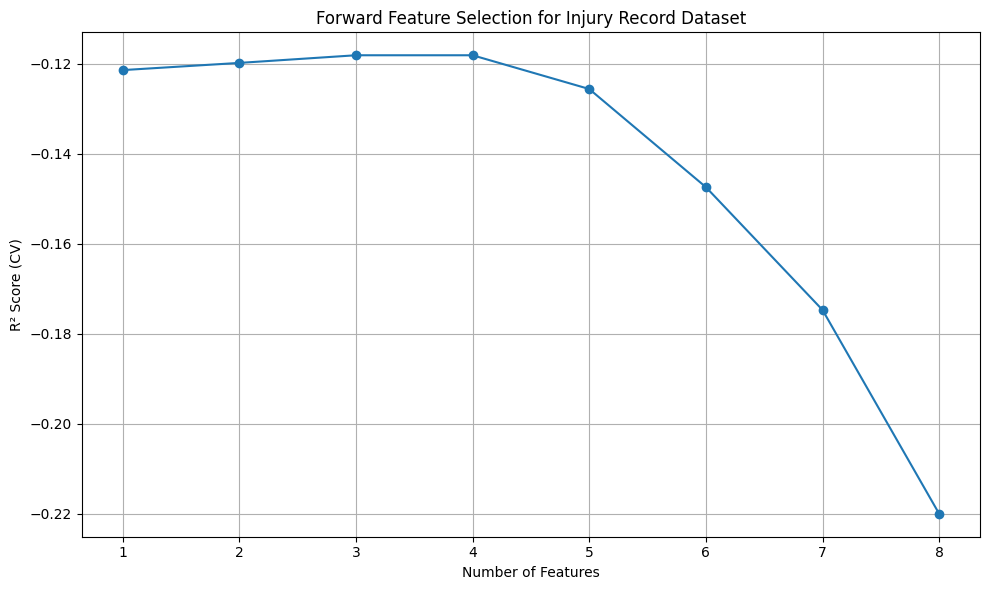

In [215]:
# Injury Record Forward Feature Selection

model = LinearRegression()
X = pd.DataFrame(X_train_scaled, columns=X_injury.columns)
y = y_train

selected_features = []
remaining_features = list(X.columns)
r2_scores = []

while remaining_features:
    scores = []
    for feature in remaining_features:
        current_features = selected_features + [feature]
        score = cross_val_score(model, X[current_features], y, cv=5, scoring='r2').mean()
        scores.append((score, feature))
    
    scores.sort(reverse=True)
    best_score, best_feature = scores[0]
    
    selected_features.append(best_feature)
    remaining_features.remove(best_feature)
    r2_scores.append(round(best_score, 4))
    print(f"Step {len(selected_features)}: Added {best_feature}, R² Score: {best_score:.4f}")

results_df_injury_record = pd.DataFrame({
    "Step": range(1, len(r2_scores) + 1),
    "R² Score": r2_scores,
    "Feature Added": selected_features
})

print("\nR² Score Table:")
print(results_df_injury_record)

plt.figure(figsize=(10, 6))
plt.plot(results_df_injury_record["Step"], results_df_injury_record["R² Score"], marker='o')
plt.xlabel("Number of Features")
plt.ylabel("R² Score (CV)")
plt.title("Forward Feature Selection for Injury Record Dataset")
plt.grid(True)
plt.tight_layout()
plt.show()


In [216]:
best_step = results_df_injury_record.loc[results_df_injury_record['R² Score'].idxmax()]
print(f"\nBest Step forward selection for Injury Record dataset:\n{best_step}")


Best Step forward selection for Injury Record dataset:
Step                  3
R² Score        -0.1181
Feature Added    DM_M42
Name: 2, dtype: object


Step 1: Removed DM_M7, R² Score: -0.1747
Step 2: Removed BodyPart, R² Score: -0.1474
Step 3: Removed PlayerKey, R² Score: -0.1256
Step 4: Removed GameID, R² Score: -0.1181
Step 5: Removed DM_M1, R² Score: -0.1181
Step 6: Removed DM_M42, R² Score: -0.1198
Step 7: Removed DM_M28, R² Score: -0.1214

R² Score Table (Backward Elimination):
   Step  R² Score Feature Removed
0     1   -0.1747           DM_M7
1     2   -0.1474        BodyPart
2     3   -0.1256       PlayerKey
3     4   -0.1181          GameID
4     5   -0.1181           DM_M1
5     6   -0.1198          DM_M42
6     7   -0.1214          DM_M28


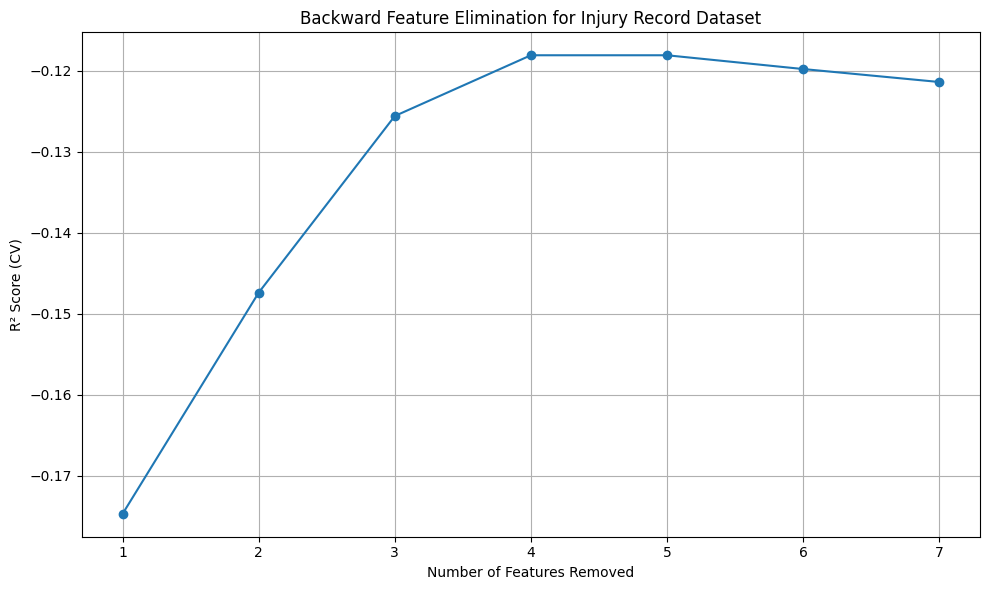

In [217]:
# Injury Record Backward Feature Selection

model = LinearRegression()
X = pd.DataFrame(X_train_scaled, columns=X_injury.columns)
y = y_train

selected_features = list(X.columns)
r2_scores = []
features_removed = []

while len(selected_features) > 1:
    scores = []
    for feature in selected_features:
        current_features = [f for f in selected_features if f != feature]
        score = cross_val_score(model, X[current_features], y, cv=5, scoring='r2').mean()
        scores.append((score, feature))
    
    scores.sort(reverse=True)
    best_score, feature_to_remove = scores[0]

    selected_features.remove(feature_to_remove)
    r2_scores.append(round(best_score, 4))
    features_removed.append(feature_to_remove)
    
    print(f"Step {len(features_removed)}: Removed {feature_to_remove}, R² Score: {best_score:.4f}")

results_df_injury_record_bwd = pd.DataFrame({
    "Step": range(1, len(r2_scores) + 1),
    "R² Score": r2_scores,
    "Feature Removed": features_removed
})

print("\nR² Score Table (Backward Elimination):")
print(results_df_injury_record_bwd)

plt.figure(figsize=(10, 6))
plt.plot(results_df_injury_record_bwd["Step"], results_df_injury_record_bwd["R² Score"], marker='o')
plt.xlabel("Number of Features Removed")
plt.ylabel("R² Score (CV)")
plt.title("Backward Feature Elimination for Injury Record Dataset")
plt.grid(True)
plt.tight_layout()
plt.show()


In [218]:
best_step = results_df_injury_record_bwd.loc[results_df_injury_record_bwd['R² Score'].idxmax()]
print(f"\nBest Step backward selection for Injury Record dataset:\n{best_step}")


Best Step backward selection for Injury Record dataset:
Step                    4
R² Score          -0.1181
Feature Removed    GameID
Name: 3, dtype: object


In [219]:
# Injury Record PCA

target_column = 'Surface'  
X_injury = df_injuryrecord.drop(columns=[target_column])
y_injury = df_injuryrecord[target_column]

n_components = min(X_train.shape[1], 10)  
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_train_pca, y_train)

y_train_pred = lr.predict(X_train_pca)

rmse_pcr_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f'PCR RMSE for Injury Record Dataset: {rmse_pcr_train:.4f}')


PCR RMSE for Injury Record Dataset: 0.4834


In [220]:
# Injury Record PLSR

target_column = 'Surface'  
X_injury = df_injuryrecord.drop(columns=[target_column])
y_injury = df_injuryrecord[target_column]

X_train = X
y_train = y

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

n_components = min(X_train.shape[1], 10)
pls = PLSRegression(n_components=n_components)
pls.fit(X_train_scaled, y_train_scaled)

y_train_pred_scaled = pls.predict(X_train_scaled)
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)

rmse_plsr_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f'PLSR RMSE for Injury Record dataset: {rmse_plsr_train:.4f}')


PLSR RMSE for Injury Record dataset: 83465167998206.1875


The last dataset, PlayList, "contains information about each player-play in the dataset, to include the player’s assigned roster position, stadium type, field type, weather, play type, position for the play, and position group". This dataset was provided with the injury_record dataset so it provides additional information regarding the environment when a player's lower body injury occurred during these two NFL seasons. The target in this case will be "PlayType" which can include kickoff, run, pass, etc.

In [221]:
#Playlist Dataset with Feature Scaling

df_playlist = pd.read_csv("PlayList.csv")

label_encoder = LabelEncoder()

print("Object columns before encoding:")
print(df_playlist.select_dtypes(include=['object']).columns)

for col in df_playlist.select_dtypes(include=['object']).columns:
    df_playlist[col] = label_encoder.fit_transform(df_playlist[col].astype(str))


target_column = 'PlayType'  
X_playlist = df_playlist.drop(columns=[target_column])
y_playlist = df_playlist[target_column]

X_train, X_test, y_train, y_test = train_test_split(X_playlist, y_playlist, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Object columns before encoding:
Index(['GameID', 'PlayKey', 'RosterPosition', 'StadiumType', 'FieldType',
       'Weather', 'PlayType', 'Position', 'PositionGroup'],
      dtype='object')


Step 1: Added GameID, R² Score: 0.0021
Step 2: Added PositionGroup, R² Score: 0.0035
Step 3: Added PlayerGame, R² Score: 0.0046
Step 4: Added PlayerGamePlay, R² Score: 0.0053
Step 5: Added PlayerDay, R² Score: 0.0057
Step 6: Added Position, R² Score: 0.0059
Step 7: Added Weather, R² Score: 0.0061
Step 8: Added StadiumType, R² Score: 0.0062
Step 9: Added PlayKey, R² Score: 0.0063
Step 10: Added RosterPosition, R² Score: 0.0063
Step 11: Added PlayerKey, R² Score: 0.0063
Step 12: Added FieldType, R² Score: 0.0063
Step 13: Added Temperature, R² Score: 0.0063

R² Score Table:
    Step  R² Score   Feature Added
0      1    0.0021          GameID
1      2    0.0035   PositionGroup
2      3    0.0046      PlayerGame
3      4    0.0053  PlayerGamePlay
4      5    0.0057       PlayerDay
5      6    0.0059        Position
6      7    0.0061         Weather
7      8    0.0062     StadiumType
8      9    0.0063         PlayKey
9     10    0.0063  RosterPosition
10    11    0.0063       PlayerKey
11

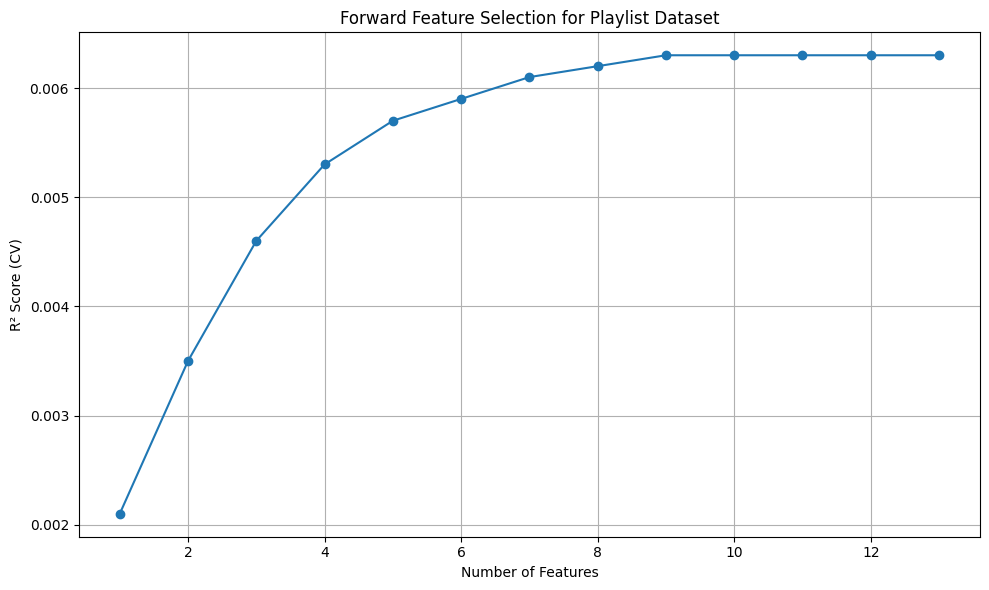

In [222]:
# Playlist Forward Feature Selection
model = LinearRegression()
X = pd.DataFrame(X_train_scaled, columns=X_playlist.columns)
y = y_train

selected_features = []
remaining_features = list(X.columns)
r2_scores = []

while remaining_features:
    scores = []
    for feature in remaining_features:
        current_features = selected_features + [feature]
        score = cross_val_score(model, X[current_features], y, cv=5, scoring='r2').mean()
        scores.append((score, feature))
    
    scores.sort(reverse=True)
    best_score, best_feature = scores[0]
    
    selected_features.append(best_feature)
    remaining_features.remove(best_feature)
    r2_scores.append(round(best_score, 4))
    print(f"Step {len(selected_features)}: Added {best_feature}, R² Score: {best_score:.4f}")

results_df_playlist = pd.DataFrame({
    "Step": range(1, len(r2_scores) + 1),
    "R² Score": r2_scores,
    "Feature Added": selected_features
})

print("\nR² Score Table:")
print(results_df_playlist)

plt.figure(figsize=(10, 6))
plt.plot(results_df_playlist["Step"], results_df_playlist["R² Score"], marker='o')
plt.xlabel("Number of Features")
plt.ylabel("R² Score (CV)")
plt.title("Forward Feature Selection for Playlist Dataset")
plt.grid(True)
plt.tight_layout()
plt.show()


In [223]:
best_step = results_df_playlist.loc[results_df_playlist['R² Score'].idxmax()]
print(f"\nBest Step forward selection for Playlist dataset:\n{best_step}")


Best Step forward selection for Playlist dataset:
Step                   9
R² Score          0.0063
Feature Added    PlayKey
Name: 8, dtype: object


Step 1: Removed Temperature, R² Score: 0.0063
Step 2: Removed FieldType, R² Score: 0.0063
Step 3: Removed PlayerKey, R² Score: 0.0063
Step 4: Removed RosterPosition, R² Score: 0.0063
Step 5: Removed PlayKey, R² Score: 0.0062
Step 6: Removed StadiumType, R² Score: 0.0061
Step 7: Removed Weather, R² Score: 0.0059
Step 8: Removed Position, R² Score: 0.0057
Step 9: Removed PlayerDay, R² Score: 0.0053
Step 10: Removed PlayerGamePlay, R² Score: 0.0046
Step 11: Removed PlayerGame, R² Score: 0.0035
Step 12: Removed PositionGroup, R² Score: 0.0021

R² Score Table (Backward Elimination):
    Step  R² Score Feature Removed
0      1    0.0063     Temperature
1      2    0.0063       FieldType
2      3    0.0063       PlayerKey
3      4    0.0063  RosterPosition
4      5    0.0062         PlayKey
5      6    0.0061     StadiumType
6      7    0.0059         Weather
7      8    0.0057        Position
8      9    0.0053       PlayerDay
9     10    0.0046  PlayerGamePlay
10    11    0.0035      Player

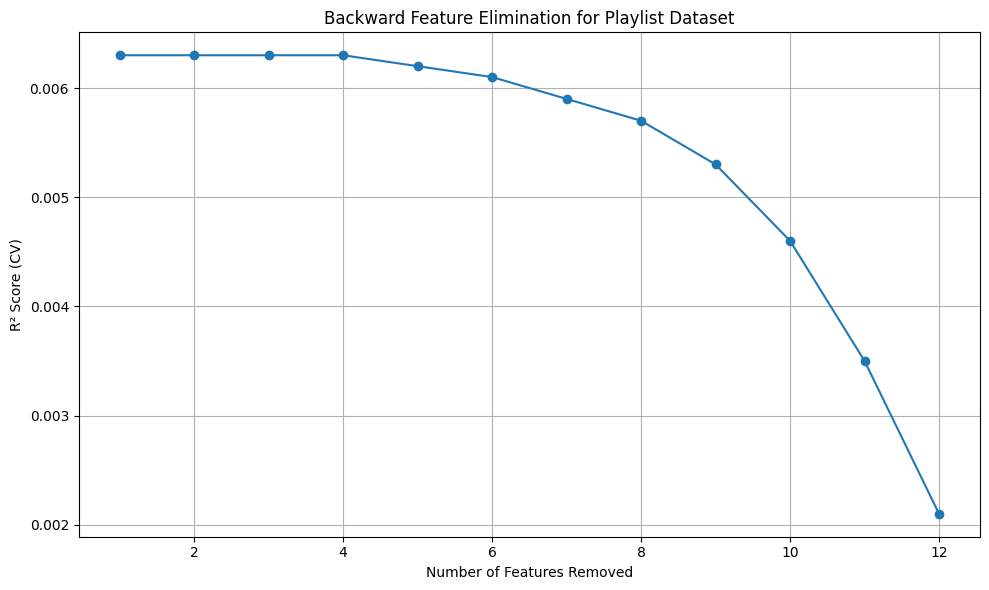

In [224]:
# Playlist Backward Feature Selection

model = LinearRegression()
X = pd.DataFrame(X_train_scaled, columns=X_playlist.columns)
y = y_train

selected_features = list(X.columns)
r2_scores = []
features_removed = []

while len(selected_features) > 1:
    scores = []
    for feature in selected_features:
        current_features = [f for f in selected_features if f != feature]
        score = cross_val_score(model, X[current_features], y, cv=5, scoring='r2').mean()
        scores.append((score, feature))
    
    scores.sort(reverse=True)
    best_score, feature_to_remove = scores[0]

    selected_features.remove(feature_to_remove)
    r2_scores.append(round(best_score, 4))
    features_removed.append(feature_to_remove)
    
    print(f"Step {len(features_removed)}: Removed {feature_to_remove}, R² Score: {best_score:.4f}")

results_df_playlist_bwd = pd.DataFrame({
    "Step": range(1, len(r2_scores) + 1),
    "R² Score": r2_scores,
    "Feature Removed": features_removed
})

print("\nR² Score Table (Backward Elimination):")
print(results_df_playlist_bwd)

plt.figure(figsize=(10, 6))
plt.plot(results_df_playlist_bwd["Step"], results_df_playlist_bwd["R² Score"], marker='o')
plt.xlabel("Number of Features Removed")
plt.ylabel("R² Score (CV)")
plt.title("Backward Feature Elimination for Playlist Dataset")
plt.grid(True)
plt.tight_layout()
plt.show()


In [225]:
best_step = results_df_playlist_bwd.loc[results_df_playlist_bwd['R² Score'].idxmax()]
print(f"\nBest Step backward selection for Playlist dataset:\n{best_step}")


Best Step backward selection for Playlist dataset:
Step                         1
R² Score                0.0063
Feature Removed    Temperature
Name: 0, dtype: object


In [226]:
# Playlist PCA

target_column = 'PlayType'  
X_playlist = df_playlist.drop(columns=[target_column])
y_playlist = df_playlist[target_column]

n_components = min(X_train.shape[1], 10)  
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_train_pca, y_train)

y_train_pred = lr.predict(X_train_pca)

rmse_pcr_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f'PCR RMSE for Playlist Dataset: {rmse_pcr_train:.4f}')

PCR RMSE for Playlist Dataset: 2.3481


In [227]:
# Playlist PLSR

target_column = 'PlayType'  
X_playlist = df_playlist.drop(columns=[target_column])
y_playlist = df_playlist[target_column]

X_train = X
y_train = y

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

n_components = min(X_train.shape[1], 10)
pls = PLSRegression(n_components=n_components)
pls.fit(X_train_scaled, y_train_scaled)

y_train_pred_scaled = pls.predict(X_train_scaled)
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)

rmse_plsr_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f'PLSR RMSE for Playlist dataset: {rmse_plsr_train:.4f}')


PLSR RMSE for Playlist dataset: 2.3465
